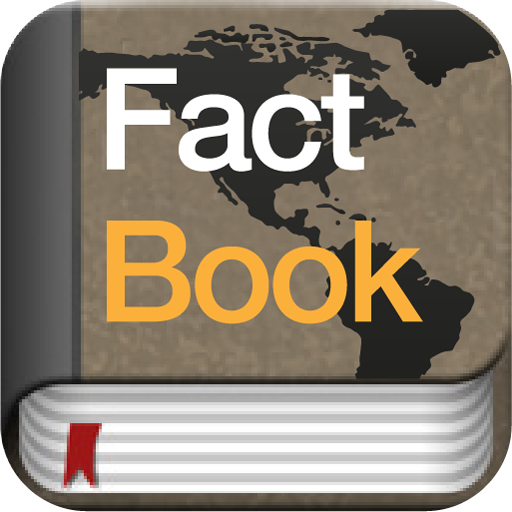

In this project, we will work with data from the CIA World Factbook 2015, a compendium of statistics about all of the countries on Earth and it will help us answer questions about the data from 2015. The Factbook contains demographic related information.


We will use SQL to explore and analyze data from this database.

In [38]:
%reload_ext sql
%sql sqlite:///factbook.db 
#We are trying to connect sql to our database here

'Connected: @factbook.db'

In [45]:
%%sql

SELECT *
  FROM sqlite_master
 WHERE type='table'; 
 #Here we format the input as a table.

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


### **Data set:**
The dataset is quite small and it contains 11 columns and 262 rows. It will only allow us answer basic questions that are not complicated.

**id** - id number attribuated to a country.

**code** - country code, made from the two first letters of the country.

**area** - total area of the country (area_water + area_land).

**population** - population of the country

**population_growth** - ratio of the population growth in 2015

<b> **birth_rate** - ratio of reproduction

**death_rate** - ratio of people that died in the country

**migration_rate** - ratio of people that left the country to another.

In [ ]:
%%sql

SELECT * FROM facts LIMIT 10

#This is to display data from facts table

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46
6,ac,Antigua and Barbuda,442,442,0,92436,1.24,15.85,5.69,2.21
7,ar,Argentina,2780400,2736690,43710,43431886,0.93,16.64,7.33,0.0
8,am,Armenia,29743,28203,1540,3056382,0.15,13.61,9.34,5.8
9,as,Australia,7741220,7682300,58920,22751014,1.07,12.15,7.14,5.65
10,au,Austria,83871,82445,1426,8665550,0.55,9.41,9.42,5.56


### **What is the maximum and minimum of population and population growth in all the countries?**

In [ ]:
%%sql
SELECT name, MAX(population) AS Highest_Population
FROM facts;

#This is to fetch the highest population and it appears the data summed up all data

 * sqlite:///factbook.db
Done.


name,Highest_Population
World,7256490011


***We will have to delete world from the rows and re-run the query***

In [ ]:
%%sql
DELETE from facts WHERE name = 'World'

 * sqlite:///factbook.db
1 rows affected.


[]

 * sqlite:///factbook.db
0 rows affected.


[]

In [ ]:
%%sql
SELECT name, MAX(population) AS Highest_Population
FROM facts;

#Highest population in the world

 * sqlite:///factbook.db
Done.


name,Highest_Population
China,1367485388


In [ ]:
%%sql
SELECT name, MIN(population) AS Lowest_Population 
FROM facts;

#Lowest population in the world

 * sqlite:///factbook.db
Done.


name,Lowest_Population
Antarctica,0


This data appears to have some outliers because Antartica has 0 population which is an indication of an outliers compared to China that has 1.3billion population

## **Finding Densely Populated Countries**

In [ ]:
%%sql
SELECT name, AVG(population) AS avg_pop, AVG(area) AS avg_area
FROM facts

#This is to fetch the average of population and area.

 * sqlite:///factbook.db
Done.


name,avg_pop,avg_area
Southern Ocean,32242666.56846473,555093.546184739


In [47]:
%%sql
SELECT name, population, area
  FROM facts
 WHERE population > (SELECT AVG(population)
                       FROM facts
                    )
   AND area < (SELECT AVG(area)
                 FROM facts
)
    ORDER BY population DESC;

#This is to fetch all countries that are above average population and below the average area

 * sqlite:///factbook.db
Done.


name,population,area
Bangladesh,168957745,148460
Japan,126919659,377915
Philippines,100998376,300000
Vietnam,94348835,331210
Germany,80854408,357022
Thailand,67976405,513120
United Kingdom,64088222,243610


Bangladesh appears to be the highest populated for it small area, followed by Japan and Philipinnes. Which means Bangladesh is more populated for it small area.

### **Finding the highest death rate compared to the population growth rate**

In [53]:
%%sql
SELECT name, population_growth, MAX(death_rate) AS highest_death_rate
FROM facts;

 * sqlite:///factbook.db
Done.


name,population_growth,highest_death_rate
Lesotho,0.32,14.89


Lesotho has the highest death rate in the table and their popuation grows at 0.32 rate.